Example notebook to showcase the use of measure_eccentricity().   
Please do not commit your local changes.

NOTE: To work with EOB or NR data, you need to get the data we are working with from `home/md.shaikh/ecc_waveforms` on CIT.


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob

import sys
sys.path.append("../")

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

%load_ext autoreload
%autoreload 2

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


### Currently implemented methods

Let's start by seeing which methods are currently implemented

In [2]:
available_methods = list(get_available_methods().keys())
print (available_methods)

['Amplitude', 'Frequency', 'ResidualAmplitude', 'ResidualFrequency']


In the following, we will use these different methods and show what the measured eccentricity looks like. The wrapper function, measure_eccentricity, allows you to easily switch between methods.

In [3]:
# Read the documentation
help(measure_eccentricity)

Help on function measure_eccentricity in module measureEccentricity.measureEccentricity:

measure_eccentricity(tref_in, dataDict, method='Amplitude', return_ecc_method=False, spline_kwargs=None, extra_kwargs=None)
    Measure eccentricity and mean anomaly at reference time.
    
    parameters:
    ----------
    tref_in:
        Input reference time at which to measure eccentricity and mean anomaly.
        Can be a single float or an array. NOTE: eccentricity/mean_ano are
        returned on a different time array tref_out, described below.
    
    dataDict:
        Dictionary containing waveform modes dict, time etc.
        Should follow the format:
            {"t": time, "hlm": modeDict, ...}
            with modeDict = {(l1, m1): h_{l1, m1},
                             (l2, m2): h_{l2, m2}, ...
                            }.
        Some methods may need extra data. For example, the ResidualAmplitude
        method, requires "t_zeroecc" and "hlm_zeroecc" as well in dataDict.
 

### Loading waveform data

Let's now get some waveform data in the required format, using the handy load_waveform function.

Waveform data for measure_eccentricity() are to be provided as a dictionary of different variables. In most cases, the required ones would be the time array and the dictionary of different modes. load_waveform function returns such a dictionary that could be directly used in the measure_eccentricity wrapper function.

In [4]:
help(load_waveform)

Help on function load_waveform in module measureEccentricity.load_data:

load_waveform(catalog='LAL', **kwargs)
    Load waveform from lvcnr file or LAL.
    
    parameters:
    ----------
    catalog:
          Waveform type. could be one of 'LAL', 'LVCNR', EOB
    
    kwargs:
         Kwargs to be passed to the waveform loading functions.



Here is an example of how to load a LAL waveform

In [5]:
# Let's try a PN eccentric model
# We use the keyword "include_zero_ecc" as we want to use the residual amplitude 
# method that needs data for the zero eccentricity counterpart as well
waveform_keywords = {"approximant": "EccentricTD",
                     "q": 1.0,
                     "chi1": [0.0, 0.0, 0.0],
                     "chi2": [0.0, 0.0, 0.0],
                     "deltaTOverM": 0.1,
                     "Momega0": 0.01,
                     "ecc": 0.1,
                     "mean_ano": 0,
                     "phi_ref": 0,
                     "inclination": 0,
                     "include_zero_ecc": True}
dataDictPN = load_waveform(catalog="LAL", **waveform_keywords)

We can use the data and see how the amplitude looks

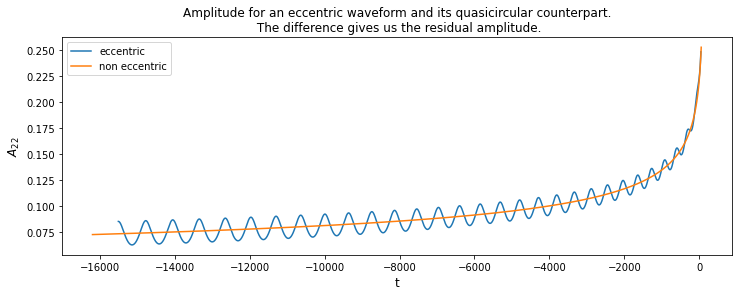

In [6]:
plt.figure(0, figsize=(12, 4))
plt.plot(dataDictPN["t"], np.abs(dataDictPN["hlm"][(2, 2)]), label="eccentric")
plt.plot(dataDictPN["t_zeroecc"], np.abs(dataDictPN["hlm_zeroecc"][(2, 2)]), label="non eccentric")
plt.xlabel('t', fontsize=12)
plt.ylabel('$A_{22}$', fontsize=12)
plt.title('Amplitude for an eccentric waveform and its quasicircular counterpart.\n '
          'The difference gives us the residual amplitude.')
plt.legend();

### Measure eccentricity at a given tref

Now that we have our dataDict ready, let's see how to use it in the measure_eccentricity wrapper function. Below we show how to get the eccentricity and mean anomaly at a given reference time.

In [7]:
# Use measure_eccentricity with your favorite method to 
# compute ecc and mean_ano at a given tref.
# The reason for having a separate tref_out is explained
# in the documentation, as well as below.
tref = -12000
tref_out, ecc, mean_ano = measure_eccentricity(tref, dataDictPN, method="Amplitude")
print (f"ecc={ecc:.3f} and mean_ano={mean_ano:.3f} at tref={tref_out}")

ecc=0.104 and mean_ano=5.951 at tref=-12000


We can try all the methods that are currently implemented

In [8]:
tref = -12000
for method in get_available_methods():
    tref_out, ecc, mean_ano = measure_eccentricity(tref, dataDictPN, method="Amplitude")
    print (f"method={method}: ecc={ecc:.3f} and mean_ano={mean_ano:.3f} at tref={tref_out}")

method=Amplitude: ecc=0.104 and mean_ano=5.951 at tref=-12000
method=Frequency: ecc=0.104 and mean_ano=5.951 at tref=-12000
method=ResidualAmplitude: ecc=0.104 and mean_ano=5.951 at tref=-12000
method=ResidualFrequency: ecc=0.104 and mean_ano=5.951 at tref=-12000


### Diagnostic plots for a method

In [10]:
tref_vec = dataDictPN["t"][dataDictPN["t"] < -300]
tref_vec = tref_vec[tref_vec > -14000]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDictPN, method="Amplitude", 
                                                                      return_ecc_method=True,
                                                                      extra_kwargs={"debug": False})

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>)

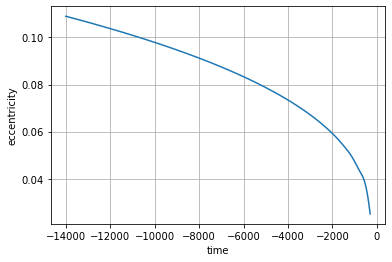

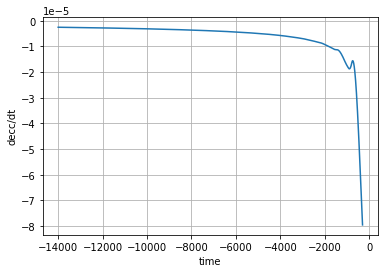

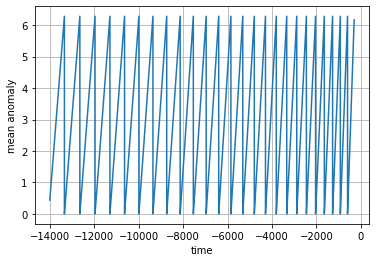

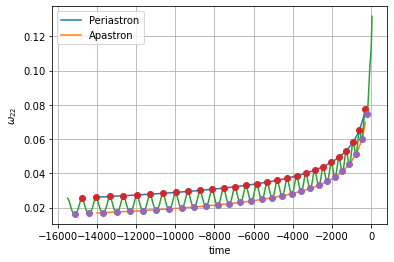

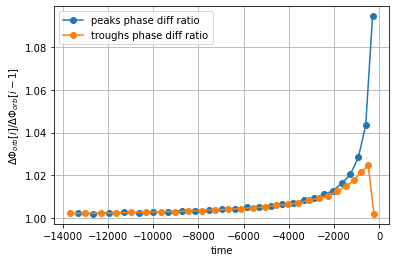

In [11]:
eccMethod.plot_measured_ecc()
eccMethod.plot_decc_dt()
eccMethod.plot_mean_ano()
eccMethod.plot_extrema_in_omega()
eccMethod.plot_phase_diff_ratio_between_peaks()

we can club these together as we wish in fig by providing an axis to plot

<AxesSubplot:xlabel='time', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>

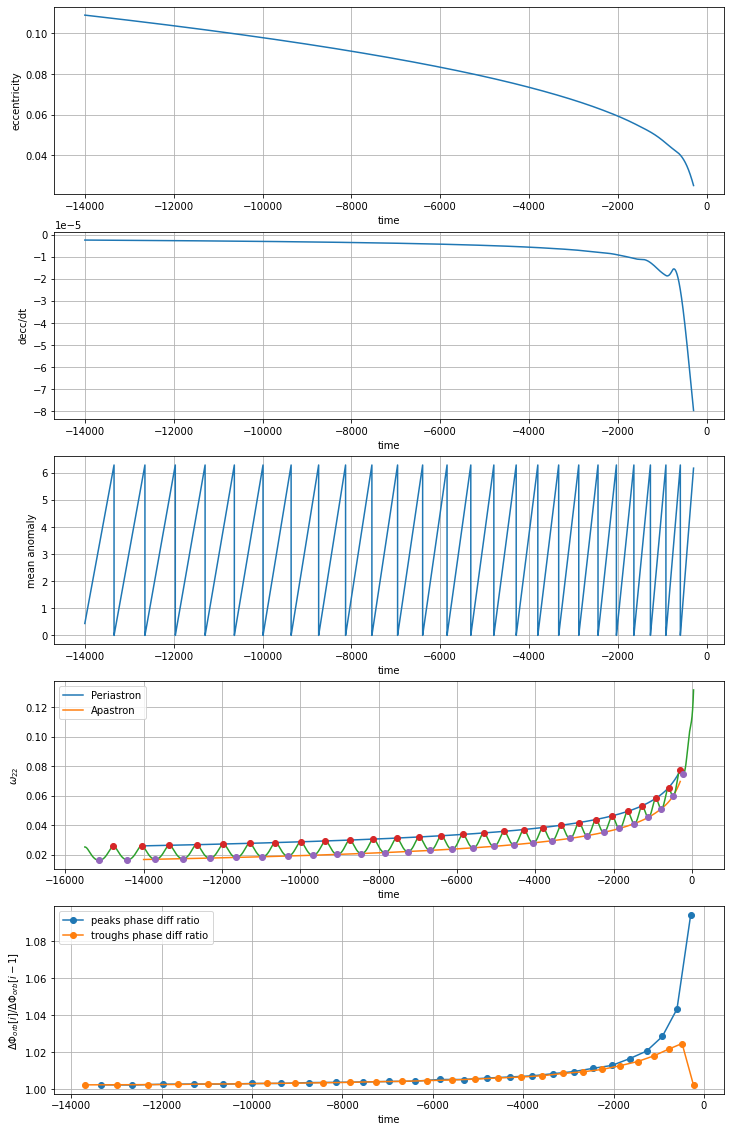

In [12]:
fig, ax = plt.subplots(nrows=5, figsize=(12, 20))
eccMethod.plot_measured_ecc(fig=fig, ax=ax[0])
eccMethod.plot_decc_dt(fig=fig, ax=ax[1])
eccMethod.plot_mean_ano(fig=fig, ax=ax[2])
eccMethod.plot_extrema_in_omega(fig=fig, ax=ax[3])
eccMethod.plot_phase_diff_ratio_between_peaks(fig=fig, ax=ax[4])

Or one can just use the in built make_diagnostic_plots to get all of these at once

(<Figure size 864x1440 with 5 Axes>,
 array([<AxesSubplot:xlabel='time', ylabel='eccentricity'>,
        <AxesSubplot:xlabel='time', ylabel='decc/dt'>,
        <AxesSubplot:xlabel='time', ylabel='mean anomaly'>,
        <AxesSubplot:xlabel='time', ylabel='$\\omega_{22}$'>,
        <AxesSubplot:xlabel='time', ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>],
       dtype=object))

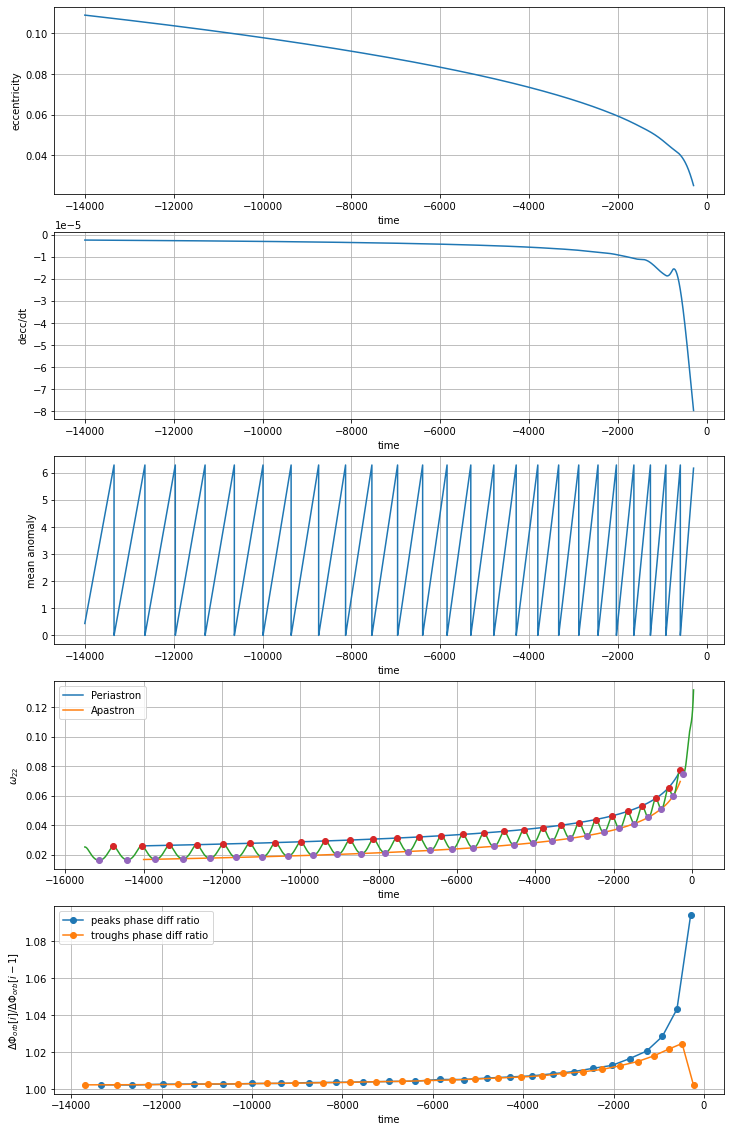

In [13]:
eccMethod.make_diagnostic_plots()